# Análise de sentimentos em textos financeiros

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
srn.set()

In [4]:
# bibliotecas para texto
import spacy
import string
import random
import re

In [5]:
base = pd.read_csv('stock_data.csv')
print(base.shape)
base.head()

(5791, 2)


,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [11]:
print(base.info())
base.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Text,5791,5791,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sentiment,5791.0,NaN,NaN,NaN,0.272664,0.962192,-1.0,-1.0,1.0,1.0,1.0


In [6]:
base['Sentiment'].value_counts() 

# +1: positivo
# -1: negativo

 1    3685
-1    2106
Name: Sentiment, dtype: int64

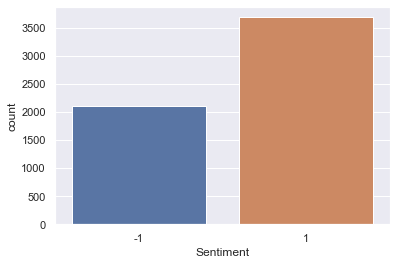

In [9]:
srn.countplot(x=base['Sentiment']);

## Pré-processamento

Temos muitos caracteres especiais que devem ser tratados!